In [1]:
### BEGIN NO TOUCH ###
%matplotlib inline
exec(compile(open("init.py", "rb").read(), "init.py", 'exec'))
import common
common.plotting.initialize_figures()
### END NO TOUCH ###
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create A Random problem
from sklearn.datasets import make_classification
n = 1000
c = 2
D, labels = make_classification(n_samples = n, 
                                n_features = 2, 
                                n_informative = 2, 
                                n_redundant = 0,
                                n_repeated = 0,
                                n_classes = c,
                                n_clusters_per_class = 1)

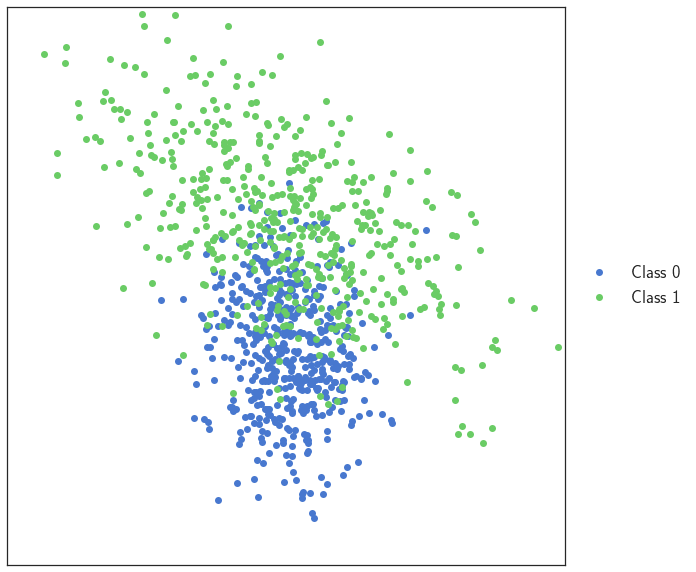

In [3]:
common.plotting.scatter_plot(D[:,0],D[:,1],labels = labels)
view_axis = plt.gca().axis()

In [4]:
## Now...can we make a linear classifier ?
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

In [5]:
lr_model.fit(D,labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
res = 100
xx, yy = np.meshgrid(np.linspace(view_axis[0], view_axis[1], res), 
                     np.linspace(view_axis[2], view_axis[3], res))

Z = lr_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

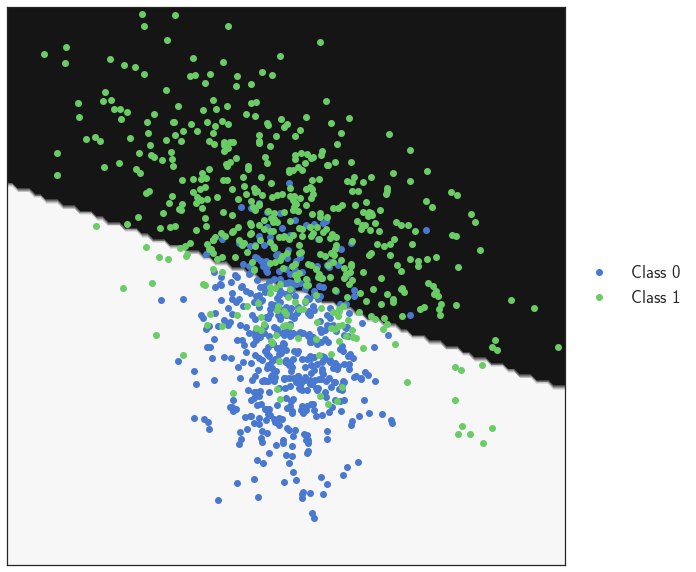

In [7]:
plt.figure(figsize=(10,10))
ax = plt.gca()
ax.contourf(xx, yy, Z)
common.plotting.scatter_plot(D[:,0],D[:,1],labels = labels, ax = ax)

In [8]:
### Convert to high dimensionality
N = 400
A = np.random.randn(N,2) # Random projection

DRandom = np.dot(A,D.transpose())
DRandom = DRandom.transpose()
# ReLU Activation
# DRandom[DRandom < 0] = 0.0

lr_model = LogisticRegression()
lr_model.fit(DRandom,labels)
mesh = np.c_[xx.ravel(), yy.ravel()]
meshRandom = np.dot(A,mesh.transpose())
ZRandom = lr_model.predict(meshRandom.transpose())
ZRandom = ZRandom.reshape(xx.shape)

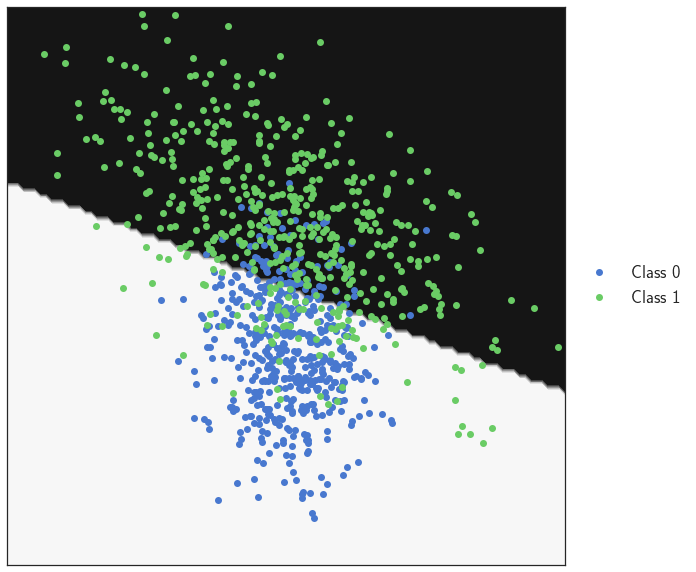

In [9]:
plt.figure(figsize=(10,10))
ax = plt.gca()
ax.contourf(xx, yy, ZRandom)
common.plotting.scatter_plot(D[:,0],D[:,1],labels = labels, ax = ax)

In [10]:
DRandom.shape

(1000, 400)

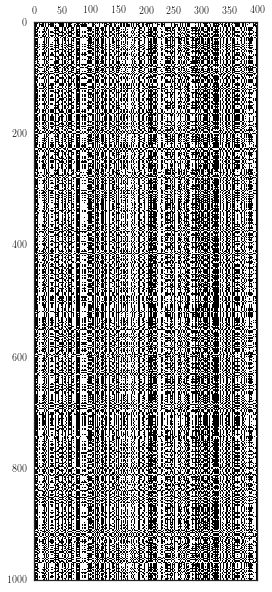

In [11]:
plt.matshow(np.sign(DRandom))